In [1]:
"""
Analyze daughter particles for annihilation event
author: Jiancheng Zeng
Date: July 12, 2023
"""

'\nAnalyze daughter particles for annihilation event\nauthor: Jiancheng Zeng\nDate: July 12, 2023\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
file_path_1 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_He3_daughters_1e7.dat'
label_50cm= '140cm width'

anti_He3_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_1)
anti_He3_Result = toy_model_analysis.Analyze_daughter(anti_He3_data_3d, -1000010020, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 14920 Events!
[##################################################] 100.00% 14920/14920
 We got 14920 events selected
Last event is 9997986


In [4]:
print(anti_He3_Result.get_value(0, 0))
print("\n")
# anti_He3_Result vector meaning: anti_He3_Result.get_value([event number][0 for general info/1 for daughter detailed info])
print(anti_He3_Result.get_value(2, 1))

[1271, 803.149, nan, 21.221996976503437, 8.389278000000001, 14.9076, 6.195900000000002]


[[1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56], [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 211, 111, 111, 211, -211, -211, 211, -211, 111, -211, -211, 211, 111, 211, 1000150310, 2112, 2212, 2112, 2112, 2112, 22], [0.418512, 0.361965, 0.42816, 0.627746, 0.397105, 0.411658, 0.537612, 0.453773, 0.413905, 0.381019, 0.54283, 0.364137, 0.403234, 364.452, 398.046, 315.708, 227.457, 226.282, 8.03989, 359.348, 22.7815, 118.073, 561.857, 478.118, 105.983, 741.915, 282.839, 2.22396, 10.7058, 5.43208, 1.90995, 7.88697, 0.942427, 5.20984], [106.57789132402917, 107.3938222003921, 107.43917100288695, 107.45915310676243, 107.31912625449642, 107.28368773885659, 107.60545013117213, 107.37956556483783, 107.43872863532599, 107.46529081307496, 107.48472836630566, 107.8671397417028, 107.60465609078867, 76.84799422411

[7889, 848.888, 172.12368365986322, 7.058468013846913, 7.41502, 7.167999999999999, 8.134939999999999]


([<matplotlib.axis.XTick at 0x7f454cb5f2b0>,
 [Text(0, 0, '-211'),
  Text(1, 0, '11'),
  Text(2, 0, '22'),
  Text(3, 0, '111'),
  Text(4, 0, '211'),
  Text(5, 0, '2112'),
  Text(6, 0, '2212'),
  Text(7, 0, '1000150310')])

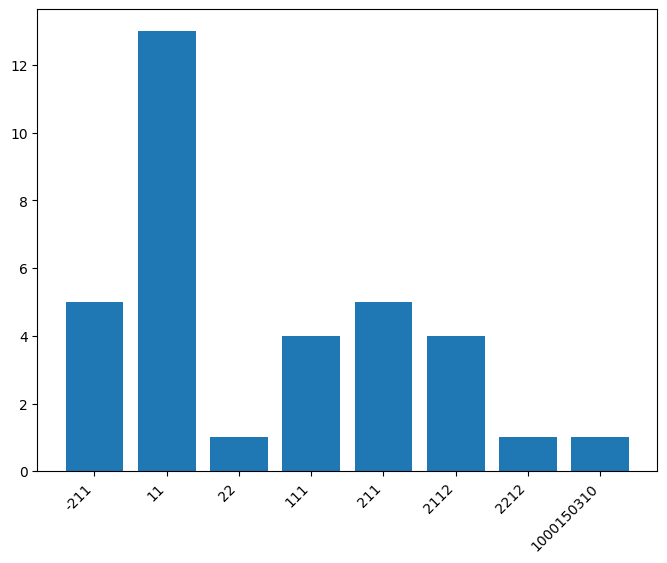

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

print(anti_He3_Result.get_value(10, 0))

# Count the occurrences of each unique element
unique_elements, element_counts = np.unique(anti_He3_Result.get_value(2, 1)[1], return_counts=True)

# Create an evenly spaced range of numbers for the x-axis
x_values = np.arange(len(unique_elements))

# Create the bar plot
plt.bar(x_values, element_counts)

# Set the x-ticks and labels
plt.xticks(x_values, unique_elements, rotation=45, ha='right')

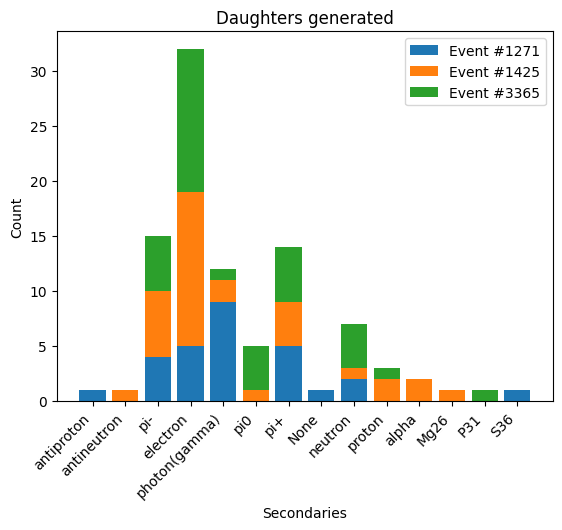

In [6]:
# This is for listing all the daughters

import matplotlib.pyplot as plt
import numpy as np

def plot_multiple_datasets(datasets):
    # Obtain the unique elements from all datasets
    unique_elements = np.unique(np.concatenate([data[1] for data in datasets]))

    # Initialize counts for each dataset
    dataset_counts = []
    for data in datasets:
        counts = np.zeros_like(unique_elements)
        for i, elem in enumerate(unique_elements):
            counts[i] = np.count_nonzero(data[1] == elem)
        dataset_counts.append(counts)

    # Create an evenly spaced range of numbers for the x-axis
    x_values = np.arange(len(unique_elements))

    # Plot the data for each dataset
    for i, counts in enumerate(dataset_counts):
        label = 'Event #' + str(anti_He3_Result.get_value(i, 0)[0])
        if i == 0:
            plt.bar(x_values, counts, label=label)
        else:
            plt.bar(x_values, counts, bottom=np.sum(dataset_counts[:i], axis=0), label=label)

    # Apply the function to the array of particle IDs using np.vectorize()
    x_name = np.vectorize(toy_model_analysis.name_of_particle)(unique_elements)

    # Set the x-ticks and labels
    plt.xticks(x_values, x_name, rotation=45, ha='right')

    # Add labels and title
    plt.xlabel('Secondaries')
    plt.ylabel('Count')
    plt.title('Daughters generated')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


datasets = []
for i in range(3):
    datasets.append([i, anti_He3_Result.get_value(i, 1)[1]])


plot_multiple_datasets(datasets)


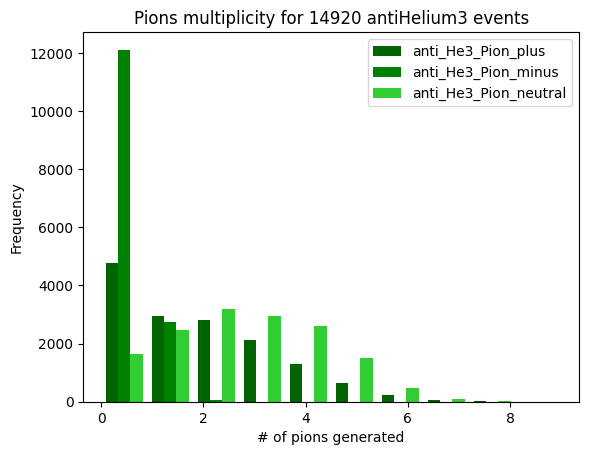

In [7]:
# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_Pion_plus = []
anti_He3_Pion_minus = []
anti_He3_Pion_neutral = []
anti_He3_Pion_Charged = []

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_Pion_plus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2112))
    anti_He3_Pion_minus.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == -2112))
    anti_He3_Pion_neutral.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 211))
    
anti_He3_Pion_profile = [anti_He3_Pion_plus, anti_He3_Pion_minus, anti_He3_Pion_neutral]
anti_He3_Pion_label = ['anti_He3_Pion_plus', 'anti_He3_Pion_minus', 'anti_He3_Pion_neutral']
anti_He3_Pion_color = ['darkgreen', 'green', 'limegreen']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_He3_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_He3_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_He3_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""
plt.figure(1)
plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color)

# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(anti_He3_Result.get_number_of_events())+' antiHelium3 events')

# Show the plot
plt.show()

In [8]:
file_path_2 = '/home/jiancheng/GRAMS/toymodel_work/output/2023/anti_proton_daughters_1e7.dat'
label_50cm= '140cm width'

anti_proton_data_3d = []
anti_proton_data_3d = toy_model_analysis.read_data_from_toymodel(file_path_2)
anti_proton_Result = toy_model_analysis.Analyze_daughter(anti_proton_data_3d, -2212, stop_event=True, in_flight_event=True)


Reading data...

Toy Model data imported
Found 16524 Events!
[##################################################] 100.00% 16524/16524
 We got 16524 events selected
Last event is 9999344


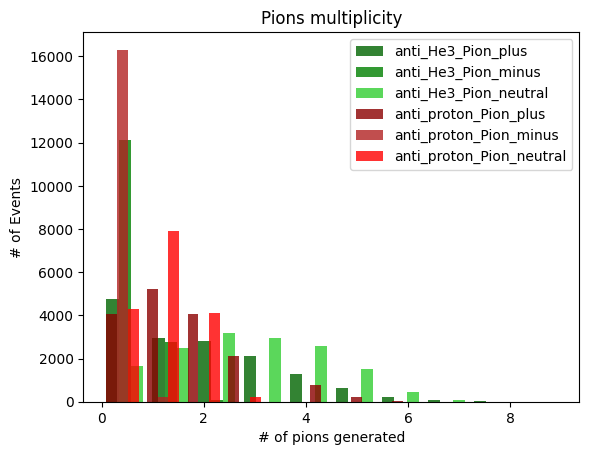

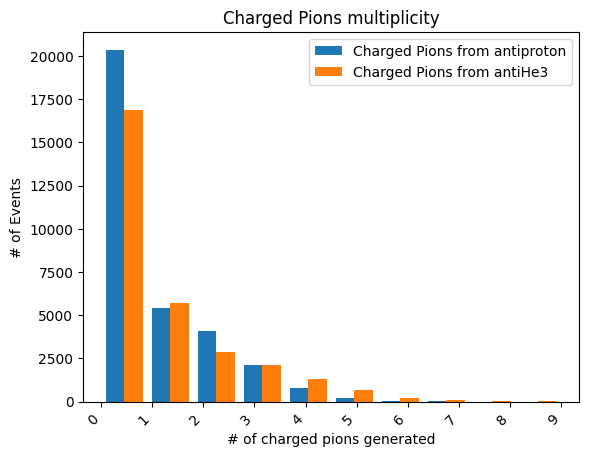

In [9]:
# This is for listing pi-/pi+/pi0 multiplicity
plt.figure(1)

anti_proton_Pion_plus = []
anti_proton_Pion_minus = []
anti_proton_Pion_neutral = []
anti_proton_Pion_Charged = []

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_Pion_plus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2112))
    anti_proton_Pion_minus.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == -2112))
    anti_proton_Pion_neutral.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 211))
    
anti_proton_Pion_profile = [anti_proton_Pion_plus, anti_proton_Pion_minus, anti_proton_Pion_neutral]
anti_proton_Pion_label = ['anti_proton_Pion_plus', 'anti_proton_Pion_minus', 'anti_proton_Pion_neutral']
anti_proton_Pion_color = ['darkred', 'firebrick', 'red']

# Count the occurrences of each value
unique_values_pi_plus, value_counts_pi_plus = np.unique(anti_proton_Pion_plus, return_counts=True)
unique_values_pi_minus, value_counts_pi_minus = np.unique(anti_proton_Pion_minus, return_counts=True)
unique_values_pi_neutral, value_counts_pi_neutral = np.unique(anti_proton_Pion_neutral, return_counts=True)
"""
# Create the bar plot
plt.bar(unique_values_pi_plus, value_counts_pi_plus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_minus, value_counts_pi_minus, alpha=0.6, label='# of Pi+ generated')
plt.bar(unique_values_pi_neutral, value_counts_pi_neutral, alpha=0.6, label='# of Pi0 generated')
"""

plt.hist(anti_He3_Pion_profile, label = anti_He3_Pion_label, color=anti_He3_Pion_color, alpha=0.8)
plt.hist(anti_proton_Pion_profile, label = anti_proton_Pion_label, color=anti_proton_Pion_color, alpha=0.8)


# Add labels and title
plt.xlabel('# of pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Pions multiplicity')

plt.figure(2)

anti_proton_Pion_Charged = anti_proton_Pion_plus+anti_proton_Pion_minus
anti_He3_Pion_Charged = anti_He3_Pion_plus+anti_He3_Pion_minus
#anti_He3_Pion_Charged.extend(anti_He3_Pion_minus)
Pion_Charged = [anti_proton_Pion_Charged, anti_He3_Pion_Charged]
Pion_Charged_label = ['Charged Pions from antiproton', 'Charged Pions from antiHe3']
plt.hist(Pion_Charged, label = Pion_Charged_label)
# Add labels and title
plt.xlabel('# of charged pions generated')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=45, ha='right')
plt.ylabel('# of Events')
plt.legend()
plt.title('Charged Pions multiplicity')

# Show the plot
plt.show()

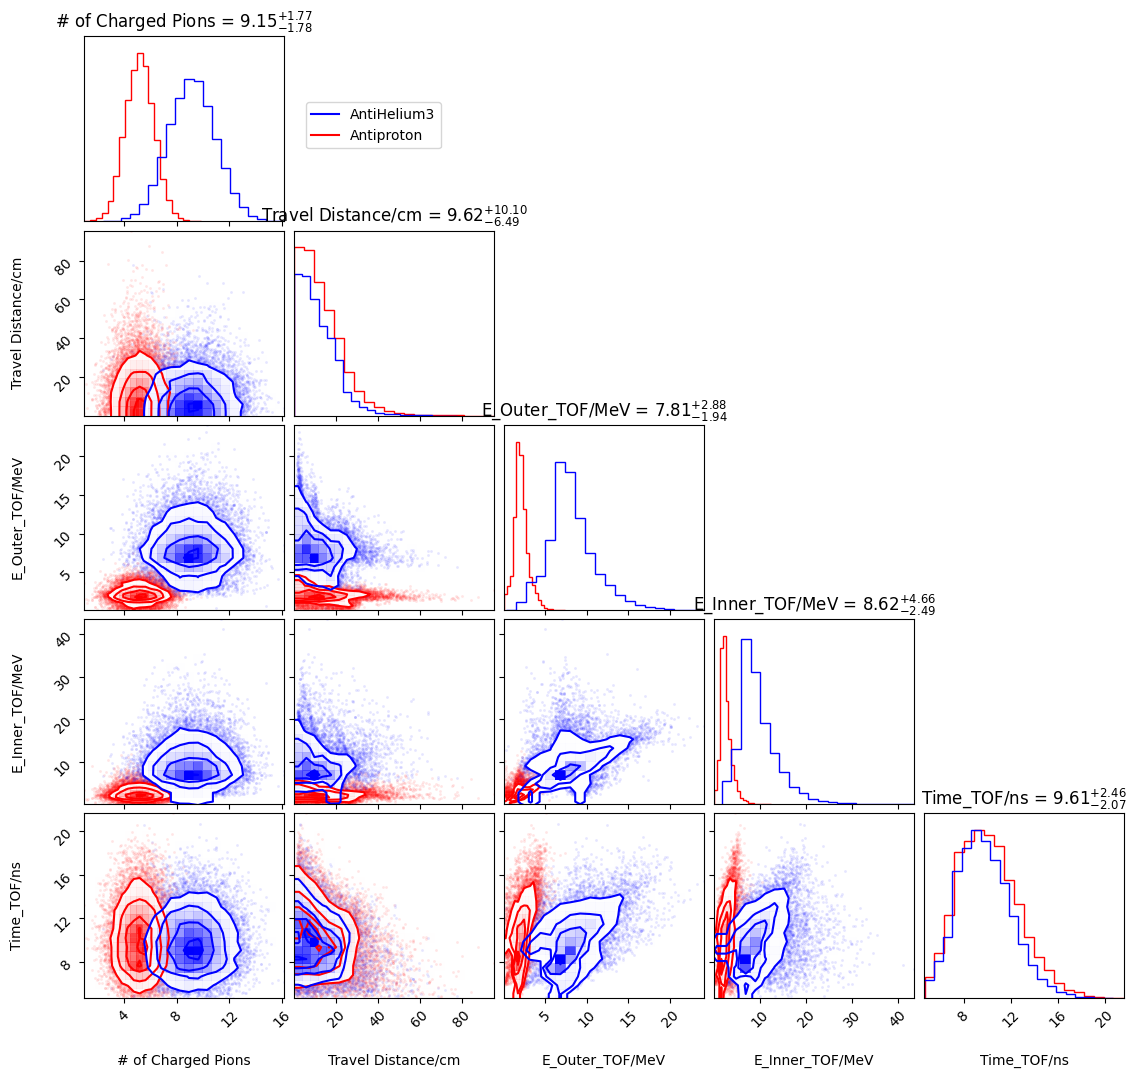

In [39]:
# This code output corner plot of daughters

# This is for antihelium3 corner plot
anti_He3_corner_Charged_pion = []
anti_He3_corner_proton = []
anti_He3_corner_distance_traveled = []
anti_He3_corner_TOF_out_energy = []
anti_He3_corner_TOF_in_energy = []
anti_He3_corner_TOF_time = []
anti_He3_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_He3_Result.get_number_of_events()):
    anti_He3_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2112,np.array(anti_He3_Result.get_value(i, 1)[1]) == -2112)))
    anti_He3_corner_proton.append(np.count_nonzero(np.array(anti_He3_Result.get_value(i, 1)[1]) == 2212))
    anti_He3_corner_distance_traveled.append(anti_He3_Result.get_value(i, 0)[3])
    anti_He3_corner_TOF_out_energy.append(anti_He3_Result.get_value(i, 0)[4])
    anti_He3_corner_TOF_in_energy.append(anti_He3_Result.get_value(i, 0)[5])
    anti_He3_corner_TOF_time.append(anti_He3_Result.get_value(i, 0)[6])


# This is for antiproton corner plot
anti_proton_corner_Charged_pion = []
anti_proton_corner_proton = []
anti_proton_corner_distance_traveled = []
anti_proton_corner_TOF_out_energy = []
anti_proton_corner_TOF_in_energy = []
anti_proton_corner_TOF_time = []
anti_proton_corner_label = ['# of Charged Pions', 'Travel Distance/cm', 'E_Outer_TOF/MeV', 'E_Inner_TOF/MeV', 'Time_TOF/ns']

for i in range(anti_proton_Result.get_number_of_events()):
    anti_proton_corner_Charged_pion.append(np.count_nonzero(np.logical_or(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2112,np.array(anti_proton_Result.get_value(i, 1)[1]) == -2112)))
    anti_proton_corner_proton.append(np.count_nonzero(np.array(anti_proton_Result.get_value(i, 1)[1]) == 2212))
    anti_proton_corner_distance_traveled.append(anti_proton_Result.get_value(i, 0)[3])
    anti_proton_corner_TOF_out_energy.append(anti_proton_Result.get_value(i, 0)[4])
    anti_proton_corner_TOF_in_energy.append(anti_proton_Result.get_value(i, 0)[5])
    anti_proton_corner_TOF_time.append(anti_proton_Result.get_value(i, 0)[6])
    

# Mean and standard deviation
#model A
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2.65 + 3.65 * np.log(4)
anti_He3_mu = 2.65 + 3.65 * np.log(6)

anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(anti_deuteron_mu * 0.174 * math.pow(4, 0.4))
anti_He3_sigma = np.sqrt(anti_He3_mu * 0.174 * math.pow(6, 0.4))
"""
#model B
anti_proton_mu = 2.65 + 3.65 * np.log(2)
anti_deuteron_mu = 2 * anti_proton_mu
anti_He3_mu = 3 * anti_proton_mu
anti_proton_sigma = np.sqrt(anti_proton_mu * 0.174 * math.pow(2, 0.4))
anti_deuteron_sigma = np.sqrt(2) * anti_proton_sigma
anti_He3_sigma = np.sqrt(3) * anti_proton_sigma
"""

# Generate random numbers from the Gaussian distribution
anti_proton_corner_Charged_pion_model = np.random.normal(anti_proton_mu, anti_proton_sigma, size=len(anti_proton_corner_Charged_pion))
anti_He3_corner_Charged_pion_model = np.random.normal(anti_He3_mu, anti_He3_sigma, size=len(anti_He3_corner_Charged_pion))


anti_proton_Corner_data = pd.DataFrame(anti_proton_corner_Charged_pion_model, columns=['Charged Pions'])
#anti_proton_Corner_data['# of protons'] = anti_proton_corner_proton
anti_proton_Corner_data['distance traveled inside LAr'] = anti_proton_corner_distance_traveled
anti_proton_Corner_data['Energy deposit in the Outer TOF'] = anti_proton_corner_TOF_out_energy
anti_proton_Corner_data['Energy deposit in the inner TOF'] = anti_proton_corner_TOF_in_energy
anti_proton_Corner_data['time differece in between TOFs'] = anti_proton_corner_TOF_time

anti_He3_Corner_data = pd.DataFrame(anti_He3_corner_Charged_pion_model, columns=['Charged Pions'])
#anti_He3_Corner_data['# of protons'] = anti_He3_corner_proton
anti_He3_Corner_data['distance traveled inside LAr'] = anti_He3_corner_distance_traveled
anti_He3_Corner_data['Energy deposit in the Outer TOF'] = anti_He3_corner_TOF_out_energy
anti_He3_Corner_data['Energy deposit in the inner TOF'] = anti_He3_corner_TOF_in_energy
anti_He3_Corner_data['time differece in between TOFs'] = anti_He3_corner_TOF_time    


figure1 = corner.corner(anti_proton_Corner_data, color='r')
figure1 = corner.corner(anti_He3_Corner_data, color='b', labels = anti_He3_corner_label, show_titles=True, fig = figure1)

# Add a separate legend to the corner plot
legend_elements = [
    plt.Line2D([0], [0], color='blue', label='AntiHelium3'),
    plt.Line2D([0], [0], color='red', label='Antiproton'),
    # Add more legend elements as needed
]

figure1.subplots_adjust(top=0.9)
figure1.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.33, 0.85), ncol=1)

# Save the plot to a file
plt.savefig("ICRC_anti_He3_corner_plot.png", dpi=300)  # Specify the desired filename and DPI



In [11]:
"""
for i in range(anti_He3_Result.get_number_of_events()):
    #if(anti_He3_Result.get_value(i, 0)[6]<0):
    print('event '+str(anti_He3_Result.get_value(i, 0)[0]) +' has time different '+ str(anti_He3_Result.get_value(i, 0)[6])+', Energy deposit in inner TOF is '+ str(anti_He3_Result.get_value(i, 0)[5]))
#plt.hist(anti_proton_corner_TOF_time)
"""

"\nfor i in range(anti_He3_Result.get_number_of_events()):\n    #if(anti_He3_Result.get_value(i, 0)[6]<0):\n    print('event '+str(anti_He3_Result.get_value(i, 0)[0]) +' has time different '+ str(anti_He3_Result.get_value(i, 0)[6])+', Energy deposit in inner TOF is '+ str(anti_He3_Result.get_value(i, 0)[5]))\n#plt.hist(anti_proton_corner_TOF_time)\n"